In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
!unzip /content/drive/My\ Drive/MNIST.zip

Streaming output truncated to the last 5000 lines.
  inflating: MNIST/images/10054.png  
  inflating: MNIST/images/10146.png  
  inflating: MNIST/images/10149.png  
  inflating: MNIST/images/10156.png  
  inflating: MNIST/images/10171.png  
  inflating: MNIST/images/10188.png  
  inflating: MNIST/images/1019.png   
  inflating: MNIST/images/10206.png  
  inflating: MNIST/images/10238.png  
  inflating: MNIST/images/10279.png  
  inflating: MNIST/images/10295.png  
  inflating: MNIST/images/10359.png  
  inflating: MNIST/images/10401.png  
  inflating: MNIST/images/10426.png  
  inflating: MNIST/images/10527.png  
  inflating: MNIST/images/10543.png  
  inflating: MNIST/images/10553.png  
  inflating: MNIST/images/10572.png  
  inflating: MNIST/images/10778.png  
  inflating: MNIST/images/10805.png  
  inflating: MNIST/images/10826.png  
  inflating: MNIST/images/10829.png  
  inflating: MNIST/images/10859.png  
  inflating: MNIST/images/1086.png   
  inflating: MNIST/images/10862.png  

In [ ]:
# import libraries and modules

%matplotlib inline

import os
import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from keras.models import Model
from keras.layers import Dense, Input, Conv2D

from skimage.io import imread

from sklearn.cluster import KMeans
from sklearn.metrics import normalized_mutual_info_score

Using TensorFlow backend.


In [ ]:
# Setting Global Random State
seed =128
rng = np.random.RandomState(seed)

In [ ]:
# define directory path
data_dir = os.path.join(os.path.abspath('.'), 'MNIST')

In [ ]:
#read data
train = pd.read_csv(os.path.join(data_dir,'train.csv'))
train.head()

,filename,label
0,0.png,4
1,1.png,9
2,2.png,1
3,3.png,7
4,4.png,3


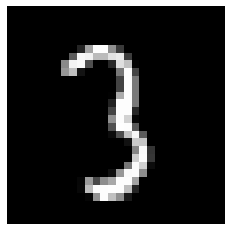

In [ ]:
# plotting some random image
img_name = rng.choice(train.filename)
filepath = os.path.join(data_dir,'images',img_name)

#read image
img = imread(filepath, as_gray=True)

#display image
plt.imshow(img, cmap='gray')
plt.axis('off')
plt.show()


In [ ]:
img.shape

(28, 28)

### Prepare the Data

In [ ]:
#read images and store them as numpy array

temp =[]
for img_name in train.filename:
  img_path = os.path.join(data_dir,'images', img_name)
  img = imread(img_path, as_gray=True)
  temp.append(img)

train_x = np.stack(temp)
train_x = train_x.reshape(-1,784).astype('float32')

In [ ]:
train_x.shape

(49000, 784)

In [ ]:
train.shape

(49000, 2)

In [ ]:
train_x.min(), train_x.max()

(0.0, 1.0)

In [ ]:
#sp-lit the data
split_size = int(train_x.shape[0]*0.7)
train_x, valid_x = train_x[:split_size], train_x[split_size:]

In [ ]:
train_x.shape, valid_x.shape

((34300, 784), (14700, 784))

# Define the architecture of Autoencoders

In [ ]:
#Input layer
input = Input(shape=(784,))

#encoder part
encoded = Dense(2000, activation='relu')(input)
encoded = Dense(500, activation='relu')(encoded)
encoded = Dense(100, activation='relu')(encoded)
encoded = Dense(10, activation='linear')(encoded)

#decoder part

decoded = Dense(100, activation='relu')(encoded)
decoded = Dense(500, activation='relu')(decoded)
decoded = Dense(784, activation='sigmoid')(decoded)

#this model reconstruct the input
autoencoder = Model(input, decoded)

#this model generate features for input image
encoder = Model(input,encoded)


In [ ]:
autoencoder.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 2000)              1570000   
_________________________________________________________________
dense_2 (Dense)              (None, 500)               1000500   
_________________________________________________________________
dense_3 (Dense)              (None, 100)               50100     
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1010      
_________________________________________________________________
dense_5 (Dense)              (None, 100)               1100      
_________________________________________________________________
dense_6 (Dense)              (None, 500)               5050

In [ ]:
encoder.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 2000)              1570000   
_________________________________________________________________
dense_2 (Dense)              (None, 500)               1000500   
_________________________________________________________________
dense_3 (Dense)              (None, 100)               50100     
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1010      
Total params: 2,621,610
Trainable params: 2,621,610
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#compile autoencoder
autoencoder.compile(optimizer='adam', loss='mse')

In [ ]:
train_history = autoencoder.fit(train_x, train_x, epochs=100, batch_size=256, validation_data=(valid_x, valid_x))

Train on 34300 samples, validate on 14700 samples
Epoch 1/100
34300/34300 [==============================] - 4s 103us/step - loss: 0.0619 - val_loss: 0.0361
Epoch 2/100
34300/34300 [==============================] - 2s 52us/step - loss: 0.0300 - val_loss: 0.0259
Epoch 3/100
34300/34300 [==============================] - 2s 50us/step - loss: 0.0233 - val_loss: 0.0214
Epoch 4/100
34300/34300 [==============================] - 2s 51us/step - loss: 0.0202 - val_loss: 0.0195
Epoch 5/100
34300/34300 [==============================] - 2s 51us/step - loss: 0.0185 - val_loss: 0.0183
Epoch 6/100
34300/34300 [==============================] - 2s 51us/step - loss: 0.0175 - val_loss: 0.0175
Epoch 7/100
34300/34300 [==============================] - 2s 50us/step - loss: 0.0167 - val_loss: 0.0171
Epoch 8/100
34300/34300 [==============================] - 2s 50us/step - loss: 0.0160 - val_loss: 0.0164
Epoch 9/100
34300/34300 [==============================] - 2s 49us/step - loss: 0.0155 - val_loss: 0.

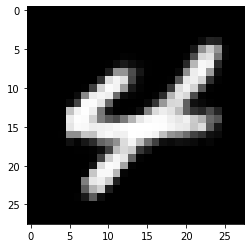

In [ ]:
#check output of autoencoder model
temp = autoencoder.predict(train_x)
plt.imshow(temp[0].reshape((28,28)), cmap='gray')

In [ ]:
#check output of model
temp = encoder.predict(train_x)
temp[0]

array([ 18.342117 , -16.338806 ,   3.3392065,  -7.057923 ,   5.82234  ,
         1.2858837,  22.174896 ,  -1.0369518,  -2.00575  , -14.778096 ],
      dtype=float32)

### Extract features from images using the trained encoder

In [ ]:
pred_feat_train = encoder.predict(train_x)
pred_feat = encoder.predict(valid_x)

# Cluster images on the basis of extracted features

In [ ]:
# train a kmeans clustering model to categorize the features of images

## define kmeans model
km = KMeans(n_jobs=-1, n_clusters=10)

In [ ]:
# train kmeans model on features extracted from training data
km.fit(pred_feat_train)

# get predictions from kmeans model on features extracted from validation data
pred = km.predict(pred_feat)

### Visualize results

This image belongs to cluster => 1


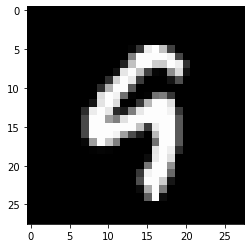

In [ ]:
index = rng.choice(range(len(valid_x)))

print("This image belongs to cluster => " + str(pred[index]))
plt.imshow(valid_x[index].reshape((28,28)), cmap='gray')
plt.show()

In [ ]:
#get actual classes
train_y = train.label.values
train_y, valid_y = train_y[:split_size], train_y[split_size:]

#compare clusters with actual classes
temp = pd.DataFrame({"valid_y":valid_y, "cluster_name":pred})
temp[temp.cluster_name == 1].head()

,valid_y,cluster_name
7,9,1
10,4,1
25,4,1
33,7,1
46,4,1


## visualize multiple images of cluster

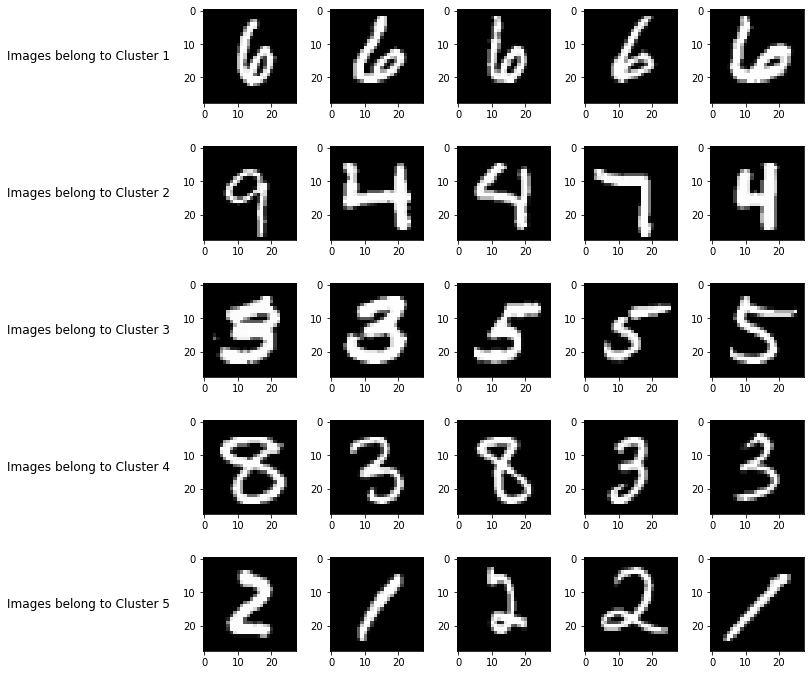

In [ ]:
# create plot

fig,axes = plt.subplots(nrows=5,ncols=5,figsize=(10,10))


## set row name on the basis of clusters
rows = ['Images belong to Cluster {}'.format(row) for row in ['1', '2', '3', '4', '5']]
for ax, row in zip(axes[:,0], rows):
    ax.annotate(row, xy=(0, 0.5), xytext=(-ax.yaxis.labelpad - 5, 0),
                xycoords=ax.yaxis.label, textcoords='offset points',
                size='large', ha='right', va='center')

## set images in subplots
for i in range(5):
  temp2 = temp[temp.cluster_name == i].head() 
  for j, img in enumerate(valid_x[temp2.index.values]):
    img = img.reshape((28, 28))
    axes[i][j].imshow(img, cmap='gray')

## adjust plot with respect to the column title
fig.tight_layout()
fig.subplots_adjust(left=0.15, top=0.95)

## show plot
plt.show()


In [ ]:
# evaluate model
normalized_mutual_info_score(pred, valid_y)

0.659681211253812